In [17]:
import os
import cv2
import numpy as np

def load_ecg_images(folder_path):
    
    images = []
    labels = []

    #  mapping folder names to class labels
    class_labels = {
        "ECG Images of Myocardial Infarction Patients (240x12=2880)": 0,
        "ECG Images of Patient that have abnormal heartbeat (233x12=2796)": 1,
        "ECG Images of Patient that have History of MI (172x12=2064)": 2,
        "Normal Person ECG Images (284x12=3408)": 3
    }

    for class_name, label in class_labels.items():
        class_folder = os.path.join(folder_path, class_name)
        for filename in os.listdir(class_folder):
            if filename.endswith(".jpg"): 
                image_path = os.path.join(class_folder, filename)
                image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) #convert to grayscale
                if image is not None:
                    images.append(image)
                    labels.append(label)

    images = np.array(images)
    labels = np.array(labels)

    return images, labels

dataset = "C:\strivera2z\ecg_classifier\data"
images, labels = load_ecg_images(dataset)
print("Number of images:", len(images))
print("Number of labels:", len(labels))
print("Label distribution:", np.bincount(labels.astype(int)))


<>:33: SyntaxWarning: invalid escape sequence '\s'
<>:33: SyntaxWarning: invalid escape sequence '\s'
C:\Users\anshk\AppData\Local\Temp\ipykernel_19736\1540610401.py:33: SyntaxWarning: invalid escape sequence '\s'
  dataset = "C:\strivera2z\ecg_classifier\data"


Number of images: 928
Number of labels: 928
Label distribution: [239 233 172 284]


<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
C:\Users\anshk\AppData\Local\Temp\ipykernel_19736\377413782.py:5: SyntaxWarning: invalid escape sequence '\s'
  sample_image_path = "C:\strivera2z\ecg_classifier\data\ECG Images of Myocardial Infarction Patients (240x12=2880)\MI(6).jpg"  # Replace this with the path to your sample image


(1572, 2213)


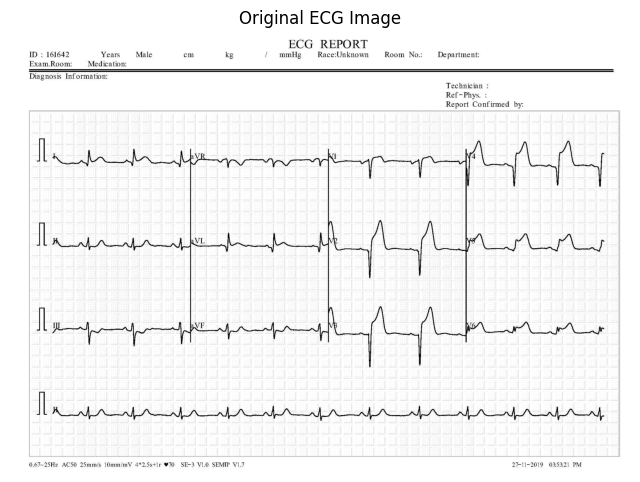

In [18]:


import cv2
import matplotlib.pyplot as plt

# Load a image to work on 
sample_image_path = "C:\strivera2z\ecg_classifier\data\ECG Images of Myocardial Infarction Patients (240x12=2880)\MI(6).jpg"  # Replace this with the path to your sample image
sample_image = cv2.imread(sample_image_path, cv2.IMREAD_GRAYSCALE)
print(sample_image.shape)

plt.figure(figsize=(8, 8))
plt.imshow(sample_image, cmap='gray')
plt.title("Original ECG Image")
plt.axis('off')
plt.show()


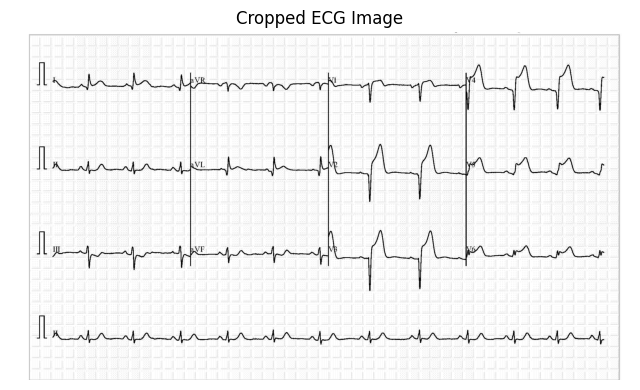

In [19]:

#adjust the factors to crop

crop_top = 275  
crop_bottom = 56  

# Crop the image
cropped_image = sample_image[crop_top:-crop_bottom, :]

plt.figure(figsize=(8, 8))
plt.imshow(cropped_image, cmap='gray')
plt.title("Cropped ECG Image")
plt.axis('off')
plt.show()


In [20]:


import os
import cv2
import numpy as np

def load_ecg_images(folder_path, crop_top=275, crop_bottom=56):

    images = []
    labels = []
    class_labels = {
        "ECG Images of Myocardial Infarction Patients (240x12=2880)": 0,
        "ECG Images of Patient that have abnormal heartbeat (233x12=2796)": 1,
        "ECG Images of Patient that have History of MI (172x12=2064)": 2,
        "Normal Person ECG Images (284x12=3408)": 3
    }

    for class_name, label in class_labels.items():
        class_folder = os.path.join(folder_path, class_name)
        for filename in os.listdir(class_folder):
            if filename.endswith(".jpg"):  
                image_path = os.path.join(class_folder, filename)
                image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                if image is not None:
                    cropped_image = image[crop_top:-crop_bottom, :]
                    images.append(cropped_image)
                    labels.append(label)

    images = np.array(images)
    labels = np.array(labels)

    return images, labels

dataset = "C:\strivera2z\ecg_classifier\data"
images, labels = load_ecg_images(dataset)
print("Number of images:", len(images))
print("Number of labels:", len(labels))
print("Label distribution:", np.bincount(labels.astype(int)))


<>:32: SyntaxWarning: invalid escape sequence '\s'
<>:32: SyntaxWarning: invalid escape sequence '\s'
C:\Users\anshk\AppData\Local\Temp\ipykernel_19736\3778438058.py:32: SyntaxWarning: invalid escape sequence '\s'
  dataset = "C:\strivera2z\ecg_classifier\data"


Number of images: 928
Number of labels: 928
Label distribution: [239 233 172 284]


In [21]:


import cv2
import numpy as np

def preprocess_images(images, target_size=(150, 150)):
    
    preprocessed_images = []
    for image in images:
        resized_image = cv2.resize(image, target_size)
        # Normalize image pixel values to range [0, 1]
        normalized_image = resized_image / 255.0
        preprocessed_images.append(normalized_image)
    preprocessed_images = np.array(preprocessed_images)
    return preprocessed_images

dataset = "C:\strivera2z\ecg_classifier\data"
images, labels = load_ecg_images(dataset)

preprocessed_images = preprocess_images(images)
print("Shape of preprocessed images:", preprocessed_images.shape)


<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\s'
C:\Users\anshk\AppData\Local\Temp\ipykernel_19736\3429593248.py:15: SyntaxWarning: invalid escape sequence '\s'
  dataset = "C:\strivera2z\ecg_classifier\data"


Shape of preprocessed images: (928, 150, 150)


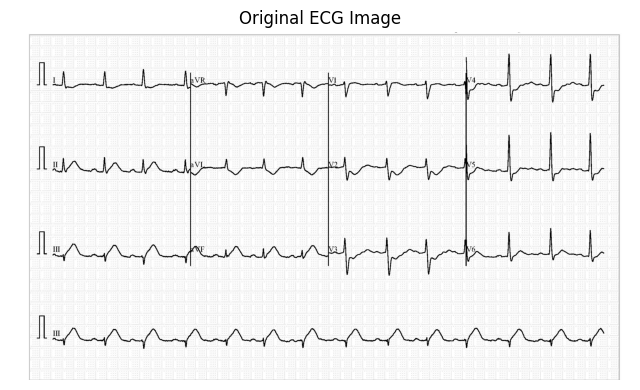

In [22]:


#randomly generate an image from any label to check 
import cv2
import matplotlib.pyplot as plt
image_index = 0
sample_image = images[image_index]
plt.figure(figsize=(8, 8))
plt.imshow(sample_image, cmap='gray')
plt.title("Original ECG Image")
plt.axis('off')
plt.show()


<>:34: SyntaxWarning: invalid escape sequence '\s'
<>:34: SyntaxWarning: invalid escape sequence '\s'
C:\Users\anshk\AppData\Local\Temp\ipykernel_19736\624068666.py:34: SyntaxWarning: invalid escape sequence '\s'
  dataset = "C:\strivera2z\ecg_classifier\data"


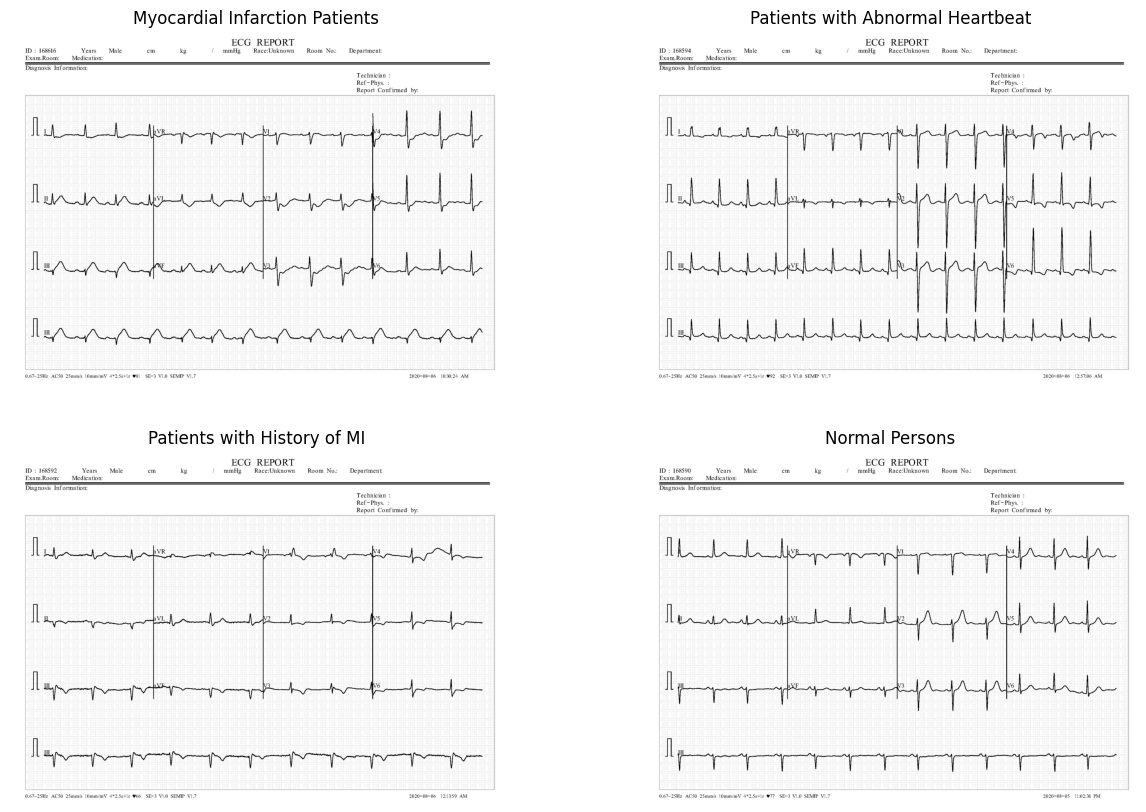

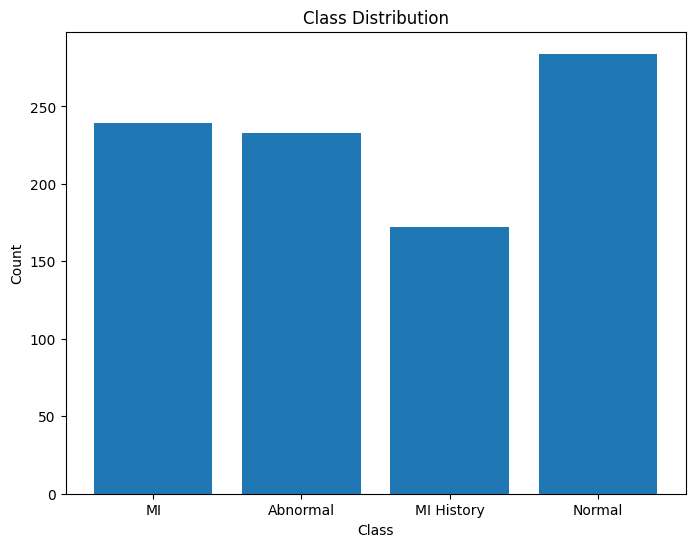

Class Imbalance Ratio: 1.6511627906976745


In [23]:

#applyin EDA 
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_ecg_images_with_labels(folder_path):
    
    images = []
    labels = []

    class_labels = {
        "ECG Images of Myocardial Infarction Patients (240x12=2880)": 0,
        "ECG Images of Patient that have abnormal heartbeat (233x12=2796)": 1,
        "ECG Images of Patient that have History of MI (172x12=2064)": 2,
        "Normal Person ECG Images (284x12=3408)": 3
    }

    for class_name, label in class_labels.items():
        class_folder = os.path.join(folder_path, class_name)
        for filename in os.listdir(class_folder):
            if filename.endswith(".jpg"): 
                image_path = os.path.join(class_folder, filename)
                image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) 
                if image is not None:
                    images.append(image)
                    labels.append(label)

    images = np.array(images)
    labels = np.array(labels)

    return images, labels

dataset = "C:\strivera2z\ecg_classifier\data"
images, labels = load_ecg_images_with_labels(dataset)

plt.figure(figsize=(15, 10))
for i, class_name in enumerate(["Myocardial Infarction Patients", "Patients with Abnormal Heartbeat", "Patients with History of MI", "Normal Persons"]):
    class_indices = np.where(labels == i)[0]
    sample_index = class_indices[0]  # first image of each class
    sample_image = images[sample_index]
    plt.subplot(2, 2, i+1)
    plt.imshow(sample_image, cmap='gray')
    plt.title(class_name)
    plt.axis('off')
plt.show()

plt.figure(figsize=(8, 6))
class_names = ["MI", "Abnormal", "MI History", "Normal"]
class_counts = np.bincount(labels)
plt.bar(class_names, class_counts)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()
min_class_count = np.min(class_counts)
max_class_count = np.max(class_counts)
class_imbalance_ratio = max_class_count / min_class_count   #find class imbalanCE
print("Class Imbalance Ratio:", class_imbalance_ratio)


In [24]:

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

def create_cnn_model(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))  
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(256, (3, 3), activation='relu')) 
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

input_shape = (150, 150, 1)  # Verify the shape from above (i/p:19)
num_classes = 4  # Total 4 classes(files)

model = create_cnn_model(input_shape, num_classes)

# Compile model 
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

model.summary()


c:\Users\anshk\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 148, 148, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 5, 5, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,504,772 (5.74 MB)

 Trainable params: 1,504,772 (5.74 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras import layers, models

# def create_modified_cnn_model(input_shape, num_classes):
#     model = models.Sequential()

#     # Input layer
#     model.add(layers.InputLayer(input_shape=input_shape))

#     # 2-D Convolutional layers
#     model.add(layers.Conv2D(32, (3, 3), activation='relu'))
#     model.add(layers.BatchNormalization())
#     model.add(layers.LeakyReLU(alpha=0.1))

#     model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#     model.add(layers.BatchNormalization())
#     model.add(layers.LeakyReLU(alpha=0.1))

#     model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#     model.add(layers.BatchNormalization())
#     model.add(layers.LeakyReLU(alpha=0.1))

#     model.add(layers.Conv2D(256, (3, 3), activation='relu'))
#     model.add(layers.BatchNormalization())
#     model.add(layers.LeakyReLU(alpha=0.1))

#     model.add(layers.Conv2D(256, (3, 3), activation='relu'))
#     model.add(layers.BatchNormalization())
#     model.add(layers.LeakyReLU(alpha=0.1))

#     # model.add(layers.Conv2D(512, (3, 3), activation='relu'))
#     # model.add(layers.BatchNormalization())
#     # model.add(layers.LeakyReLU(alpha=0.1))

#     # Max pooling layers
#     model.add(layers.MaxPooling2D((2, 2)))

#     model.add(layers.Conv2D(512, (3, 3), activation='relu'))
#     model.add(layers.BatchNormalization())
#     model.add(layers.LeakyReLU(alpha=0.1))

#     # Fully connected layers
#     model.add(layers.Flatten())
#     model.add(layers.Dropout(0.5))
#     model.add(layers.Dense(512, activation='relu'))
#     model.add(layers.Dropout(0.5))
#     model.add(layers.Dense(256, activation='relu'))
#     model.add(layers.Dropout(0.5))

#     # Depth concatenation layer
#     model.add(layers.Concatenate())

#     # Output layer
#     model.add(layers.Dense(num_classes, activation='softmax'))

#     return model

# # Example input/output shape and number of classes
# input_shape = (150, 150, 1)
# num_classes = 4

# # Create the modified CNN model
# modified_model = create_modified_cnn_model(input_shape, num_classes)

# # Compile the model 
# modified_model.compile(optimizer='adam',
#                        loss='sparse_categorical_crossentropy',
#                        metrics=['accuracy'])

# # Print model summary
# modified_model.summary()


In [26]:

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(preprocessed_images, labels, test_size=0.2, random_state=42)

# Reshape the input data to fit the CNN model (add channel dimension for grayscale images)
X_train = np.expand_dims(X_train, axis=-1)
X_val = np.expand_dims(X_val, axis=-1)

# Define model callbacks (optional)
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint("best_model.keras", save_best_only=True)
]

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=callbacks)

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val)

print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)


Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 17s 543ms/step - accuracy: 0.2527 - loss: 1.3976 - val_accuracy: 0.3065 - val_loss: 1.3790
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 478ms/step - accuracy: 0.2972 - loss: 1.3727 - val_accuracy: 0.3065 - val_loss: 1.3763
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 481ms/step - accuracy: 0.3168 - loss: 1.3705 - val_accuracy: 0.3065 - val_loss: 1.3643
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 441ms/step - accuracy: 0.3140 - loss: 1.3475 - val_accuracy: 0.3602 - val_loss: 1.3180
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 440ms/step - accuracy: 0.4364 - loss: 1.2129 - val_accuracy: 0.5054 - val_loss: 1.0171
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 437ms/step - accuracy: 0.6525 - loss: 0.8848 - val_accuracy: 0.5860 - val_loss: 0.9427
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 416ms/step - accuracy: 0.6666 - loss: 0.8098 - val_accuracy: 0.6505 - val_loss: 0.8072
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 406ms/step - accuracy: 0.7422 - loss: 0.6530 - val_accu

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/stepWARNING:tensorflow:5 out of the last 13 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000002043E485800> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step


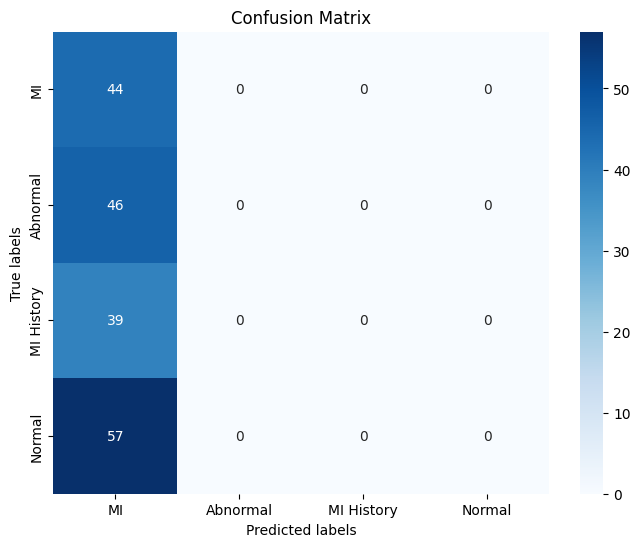

Classification Report:
              precision    recall  f1-score   support

          MI       0.24      1.00      0.38        44
    Abnormal       0.00      0.00      0.00        46
  MI History       0.00      0.00      0.00        39
      Normal       0.00      0.00      0.00        57

    accuracy                           0.24       186
   macro avg       0.06      0.25      0.10       186
weighted avg       0.06      0.24      0.09       186

Number of misclassified samples: 142


c:\Users\anshk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\anshk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\anshk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

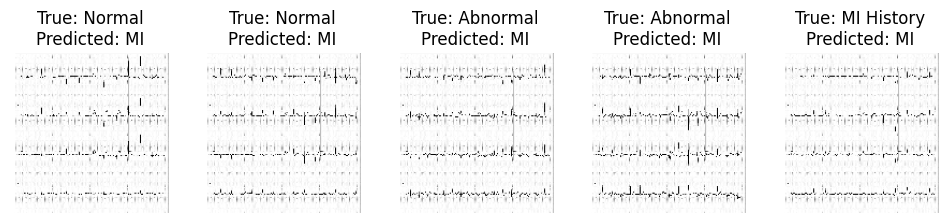

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Assuming you've defined class_labels earlier

best_model = tf.keras.models.load_model("best_model.keras")
X_test_preprocessed = preprocess_images(X_val)
X_test_preprocessed = np.expand_dims(X_test_preprocessed, axis=-1)
y_pred_prob = best_model.predict(X_test_preprocessed)
y_pred = np.argmax(y_pred_prob, axis=1)
conf_matrix = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:")
print(classification_report(y_val, y_pred, target_names=class_names))

misclassified_indexes = np.where(y_pred != y_val)[0]
num_misclassified = len(misclassified_indexes)
print("Number of misclassified samples:", num_misclassified)

plt.figure(figsize=(12, 6))
for i, idx in enumerate(misclassified_indexes[:5]):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_val[idx], cmap='gray')  # Use X_val instead of X_test
    plt.title(f'True: {class_names[y_val[idx]]}\nPredicted: {class_names[y_pred[idx]]}')
    plt.axis('off')
plt.show()


In [28]:


def preprocess_input_image(image_path, target_size=(150, 150), crop_top=275, crop_bottom=56):
    input_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    #cropped_image = input_image[crop_top:-crop_bottom, :]

    resized_image = cv2.resize(cropped_image, target_size)

    # Normalize image pixel values to range [0, 1]
    preprocessed_image = resized_image / 255.0

    preprocessed_image = np.expand_dims(preprocessed_image, axis=0)

    return preprocessed_image

def classify_ecg_image(input_image, model):
    
    predicted_probabilities = model.predict(input_image)
    
    predicted_class = np.argmax(predicted_probabilities)
    predicted_class_name = class_names[predicted_class]

    return predicted_class, predicted_class_name

best_model = tf.keras.models.load_model("C:/strivera2z/ecg_classifier/best_model.keras")  # Replace with the path to your saved model file

input_image_path = "C:\strivera2z\ecg_classifier\data\ECG Images of Myocardial Infarction Patients (240x12=2880)\MI(6).jpg"  # Replace with the path to your input image
preprocessed_input_image = preprocess_input_image(input_image_path)
predicted_class = classify_ecg_image(preprocessed_input_image, best_model)

print("Predicted class label:", predicted_class)


<>:26: SyntaxWarning: invalid escape sequence '\s'
<>:26: SyntaxWarning: invalid escape sequence '\s'
C:\Users\anshk\AppData\Local\Temp\ipykernel_19736\1882011136.py:26: SyntaxWarning: invalid escape sequence '\s'
  input_image_path = "C:\strivera2z\ecg_classifier\data\ECG Images of Myocardial Infarction Patients (240x12=2880)\MI(6).jpg"  # Replace with the path to your input image


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
Predicted class label: (0, 'MI')
